In [1]:
import pandas as pd
import numpy as np

### Importing the Dataset

In [166]:
data = pd.read_excel('BMI_Data.xlsx')

### Describing the Statistical Parameters of the Dataset

In [167]:
data.describe()

,Weight in Pounds,BMI,Cholesterol
count,761.000000,761.000000,761.000000
mean,205.539075,86.556922,257.247678
std,17.098299,2.262907,27.467817
min,27.870000,83.716540,0.000000
25%,205.380000,84.979620,248.631520
50%,208.830000,85.875630,264.743919
75%,211.920000,87.566590,272.940000
max,218.360000,98.260000,309.478148


###  Checking for the NULL values in the dataset

In [168]:
data.isnull().sum()

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
dtype: int64

### We can clearly see that the data has no NULL values. Now, lets check the correlation among the columns of the dataset.

In [169]:
correlation = data.corr()

In [170]:
correlation

,Weight in Pounds,BMI,Cholesterol
Weight in Pounds,1.000000,0.007376,0.563185
BMI,0.007376,1.000000,-0.003473
Cholesterol,0.563185,-0.003473,1.000000


## Visualising the Dataset

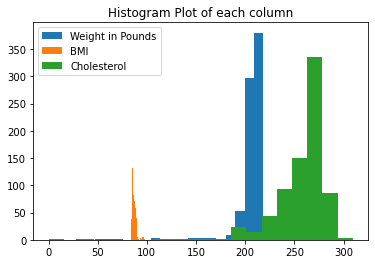

In [171]:
import matplotlib.pyplot as plt
plt.hist(data['Weight in Pounds'],bins=20)
plt.hist(data['BMI'],bins=20)
plt.hist(data['Cholesterol'],bins=20)
plt.legend(['Weight in Pounds','BMI','Cholesterol'])
plt.title('Histogram Plot of each column')
plt.show()

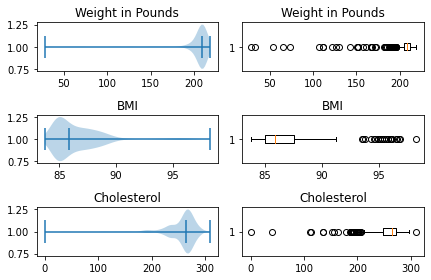

In [172]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=2)
ax1[0].violinplot(data['Weight in Pounds'],showmedians=True,vert=False)
ax1[0].set_title('Weight in Pounds')
ax2[0].violinplot(data['BMI'],showmedians=True,vert=False)
ax2[0].set_title('BMI')
ax3[0].violinplot(data['Cholesterol'],showmedians=True,vert=False)
ax3[0].set_title('Cholesterol')
ax1[1].boxplot(data['Weight in Pounds'],vert=False)
ax1[1].set_title('Weight in Pounds')
ax2[1].boxplot(data['BMI'],vert=False)
ax2[1].set_title('BMI')
ax3[1].boxplot(data['Cholesterol'],vert=False)
ax3[1].set_title('Cholesterol')
fig.tight_layout()
plt.show()

### We get a good estimate of the spread of each column and their distribution. The Weight column has the highest concentration of values between 200 and 225, the BMI column has the highest concentration of values around 85, and the Cholesterol column has the highest concentration of values between 260 to 280.

### Now let us plot some graphs to visualise the relations among the columns.

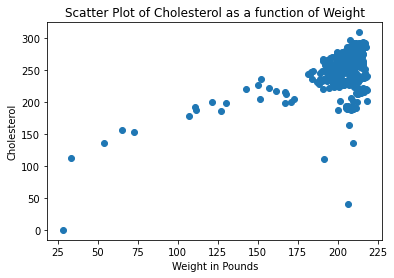

In [173]:
import matplotlib.pyplot as plt
x=data['Weight in Pounds']
y=data['Cholesterol']
plt.scatter(x,y)
plt.xlabel('Weight in Pounds')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Cholesterol as a function of Weight')
plt.show()

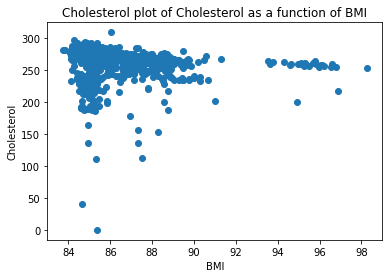

In [174]:
import matplotlib.pyplot as plt
x=data['BMI']
y=data['Cholesterol']
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.title('Cholesterol plot of Cholesterol as a function of BMI')
plt.show()

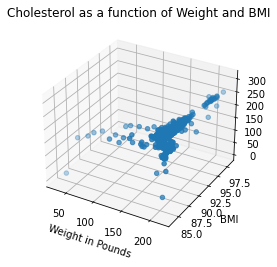

In [175]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax  = plt.axes(projection ='3d')
z   = data['Cholesterol']
x   = data['Weight in Pounds']
y   = data['BMI']
plt.xlabel('Weight in Pounds')
plt.ylabel('BMI')
plt.title('Cholesterol as a function of Weight and BMI')
ax.scatter(x,y,z,'green')
plt.show()

## Now Let us build our prediction models

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
data=data.drop(['Date'],axis=1)

In [198]:
data_scaled=MinMaxScaler().fit_transform(data)
data_scaled=pd.DataFrame(data_scaled)

In [199]:
X=data_scaled.iloc[:,:-1]
Y=data_scaled.iloc[:,-1]

### Calling a list of regression models from sklearn. After fitting, we can compare these models using a suitable metric and select the best model.

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb



### Caling the train_test_split and mean squared error metric.

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Defining a function that would load all the models in a list.

In [202]:
def get_models():
    models = []
    models.append(LinearRegression())
    models.append(Ridge())
    models.append(Lasso())
    models.append(ElasticNet())
    models.append(BayesianRidge())
    models.append(SGDRegressor())
    models.append(PassiveAggressiveRegressor())
    models.append(KNeighborsRegressor())
    models.append(DecisionTreeRegressor())
    models.append(ExtraTreeRegressor())
    models.append(SVR())
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor())
    models.append(RandomForestRegressor())
    models.append(ExtraTreesRegressor())
    models.append(GaussianProcessRegressor())
    models.append(GradientBoostingRegressor())
    models.append(xgb.XGBRegressor())
    return models

In [203]:
models = get_models()

### This piece of code gives a list of all the trained models along with their respective mean sqaured error.

In [204]:
trained_models = {}
model_performance={}
for i in range(len(models)):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
    models[i].fit(X_train,Y_train)
    trained_models[type(models[i]).__name__]=models[i]
    y_pred=models[i].predict(X_test)
    rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
    model_performance[type(models[i]).__name__]={'Mean_squared_error':rmse}
print(model_performance)
    
    
    
    
    
    

{'LinearRegression': {'Mean_squared_error': 0.06806145531186604}, 'Ridge': {'Mean_squared_error': 0.06928057157009829}, 'Lasso': {'Mean_squared_error': 0.0823653043835305}, 'ElasticNet': {'Mean_squared_error': 0.07268902812785528}, 'BayesianRidge': {'Mean_squared_error': 0.09029223422037005}, 'SGDRegressor': {'Mean_squared_error': 0.08030907019890737}, 'PassiveAggressiveRegressor': {'Mean_squared_error': 0.286344133376732}, 'KNeighborsRegressor': {'Mean_squared_error': 0.08067954586834544}, 'DecisionTreeRegressor': {'Mean_squared_error': 0.10280011200260127}, 'ExtraTreeRegressor': {'Mean_squared_error': 0.09142115610648872}, 'SVR': {'Mean_squared_error': 0.07654975952569605}, 'AdaBoostRegressor': {'Mean_squared_error': 0.06494900093613279}, 'BaggingRegressor': {'Mean_squared_error': 0.06594754783519009}, 'RandomForestRegressor': {'Mean_squared_error': 0.0835722097849381}, 'ExtraTreesRegressor': {'Mean_squared_error': 0.07074288565532347}, 'GaussianProcessRegressor': {'Mean_squared_erro

In [205]:
trained_models


{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'BayesianRidge': BayesianRidge(),
 'SGDRegressor': SGDRegressor(),
 'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
 'KNeighborsRegressor': KNeighborsRegressor(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'ExtraTreeRegressor': ExtraTreeRegressor(),
 'SVR': SVR(),
 'AdaBoostRegressor': AdaBoostRegressor(),
 'BaggingRegressor': BaggingRegressor(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'GaussianProcessRegressor': GaussianProcessRegressor(),
 'GradientBoostingRegressor': GradientBoostingRegressor(),
 'XGBRegressor': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       

### We have got a dictionary of trained models. We can call any model to make our prediction. For example, lets try to call our Linear Regression Model and test its root mean squared error.

In [209]:
Model=trained_models['LinearRegression']

In [210]:
y_pred=Model.predict(X)

In [213]:
print(np.sqrt(mean_squared_error(Y,y_pred)))

0.07342158192576402
